# Tutorial of Python library for Large-scale map matching algorithm

1. requirements
> we assume that you have a hdf5 data file as a taxidata. and the library taxidata is installed.


In [3]:
import taxidata as td

## 1. Data load

### Taxi Data load

load the taxi data from hdf5

In [2]:
Tdset = td.Dataset("../notebook/2013-12-11.hdf5")

In [3]:
Tdset.fields

['ang', 'lat', 'lon', 'psg', 'valid', 'vel', 'x', 'y', 'z']

In [4]:
len(Tdset)

86349371

In [5]:
td_array_single = Tdset.get_array(num = 1, random = False, fields=['x','y','psg','vel'],position=('x','y'))

1 taxis founded in data with given condition.


(306835.35, 336879.65, 4150415.75, 4160563.25)

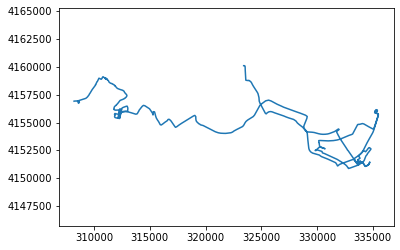

In [6]:
import matplotlib.pyplot as plt
plt.plot(*td_array_single.pos.T,'-', markersize = 1)
plt.axis('equal')

In [7]:
td_arrays = Tdset.get_array(num = 10, random = False, fields=['x','y','psg','vel'],position=('x','y'))

10 taxis founded in data with given condition.


### Network loads

In [2]:
Seoul = td.load_seoul()

c:\Users\Jeong\master\complecity\taxidata\core\network\nodelink\Seoul_Edgelist.csv
